In [1]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

c:\users\user\python37.64\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\python37.64\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\python37.64\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\python37.64\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
labels = pd.read_csv("eye_gender_data/Training_set.csv") # loading the labels
file_paths = [[fname, 'eye_gender_data/train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

labelencoder = LabelEncoder()
train_data['labels']=labelencoder.fit_transform(train_data['label'])
train_data=train_data.drop('label',axis=1)

data = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
    img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) 
    new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
    data.append([new_img_array, train_data['labels'][i]])
    
    
x = []
y = []
for image in data:
    x.append(image[0])
    y.append(image[1])

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

x = x.reshape(9220, 100, 100,1)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.3, random_state = 42)

In [8]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255

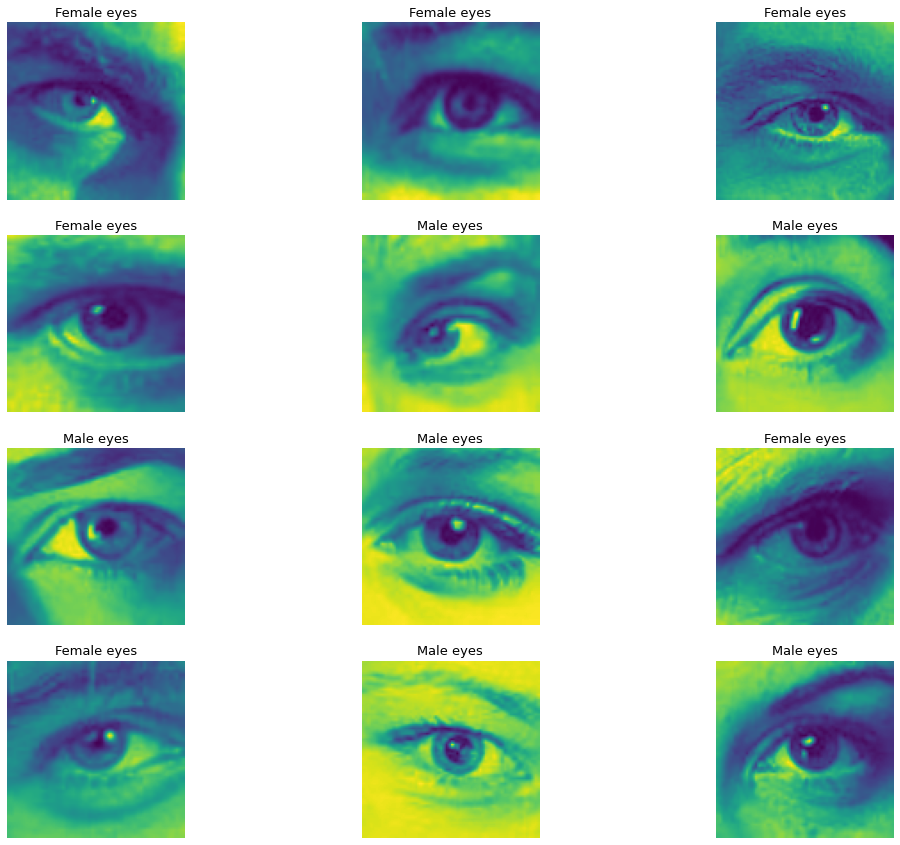

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,15))
for i in range(12):
    plt.subplot(4,3,(i%12)+1)
    rnd_idx=np.random.randint(1000)
    if y[rnd_idx]==1:
        plt.title('Female eyes',fontdict={'size':13})
    else:
        plt.title('Male eyes',fontdict={'size':13})
    
    plt.axis('off')
    plt.imshow(x[rnd_idx])

In [25]:
INPUT_SHAPE = (100, 100,1)

# define sequential model
model = tf.keras.models.Sequential()

# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.25))

# add output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#model.add(tf.keras.layers.Dropout(0.05))

# compile model
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               4333824   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [ ]:
EPOCHS = 6

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,
restore_best_weights=True,
verbose=1)

history = model.fit(X_train,
y_train,
#callbacks=[es_callback],
validation_data=(X_val,y_val), epochs=EPOCHS,
batch_size=100,
verbose=1)

Train on 6454 samples, validate on 2766 samples
Epoch 1/6
6454/6454 [==============================] - 53s 8ms/sample - loss: 0.0274 - acc: 0.9907 - val_loss: 0.3838 - val_acc: 0.9082
Epoch 2/6
6454/6454 [==============================] - 53s 8ms/sample - loss: 0.0182 - acc: 0.9935 - val_loss: 0.4122 - val_acc: 0.9129
Epoch 3/6
6454/6454 [==============================] - 53s 8ms/sample - loss: 0.0225 - acc: 0.9924 - val_loss: 0.3978 - val_acc: 0.9046
Epoch 4/6
2500/6454 [==========>...................] - ETA: 28s - loss: 0.0185 - acc: 0.9944

In [ ]:
labels = pd.read_csv("eye_gender_data/Testing_set.csv") # loading the labels
file_paths = [[fname, 'eye_gender_data/test/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')


data = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
    img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) 
    new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
    data.append([new_img_array])
    
    
x = []
for image in data:
    x.append(image[0])

# converting x & y to numpy array as they are list
x = np.array(x)

x = x.reshape(2305, 100, 100,1)

In [ ]:
test_images_scaled = x / 255.
predictions = model.predict(test_images_scaled)
predictions[:5]

In [ ]:
prediction_labels = np.argmax(predictions, axis=1)
        
print(prediction_labels)

In [ ]:
from sklearn import preprocessing
res = pd.DataFrame({'filename': train_data['filename'], 'label': prediction_labels}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.label=res.label.astype('category')
le = preprocessing.LabelEncoder()
le.fit(["male","female"])
res.label=le.inverse_transform(res.label)

res.head()




In [ ]:
res.to_csv("submission.csv", index = False)